<a href="https://colab.research.google.com/github/habibaarthi/stock_predict/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance plotly scikit-learn --quiet


X shape before reshaping: (28, 2)
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 0.2719 - val_loss: 0.3770
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2516 - val_loss: 0.3247
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2445 - val_loss: 0.2771
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2008 - val_loss: 0.2368
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1700 - val_loss: 0.2022
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1077 - val_loss: 0.1752
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1167 - val_loss: 0.1533
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1178 - val_loss: 0.1385
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1169 - val_loss: 0.1295
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1459 - val_loss: 0.1243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

--- LSTM Model Evaluation ---
MAE: 29.763637898763022
RMSE: 31.26902220114528
R² Score: -0.9477127236810925


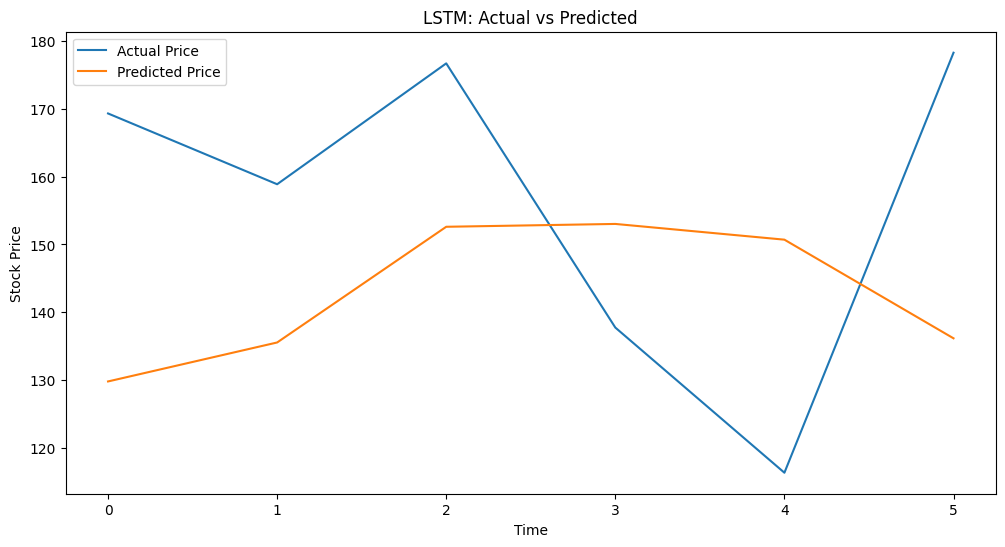

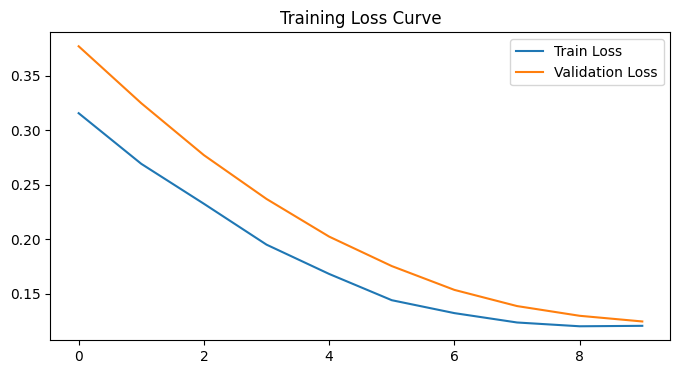

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your mock dataset (22 data points)
df = pd.read_csv("mock_stock_data.csv")
df = df[['Close']]  # Use only the 'Close' prices

# Step 1: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])

# Step 2: Create sequences with time_step = 2 (or 1 for minimal steps)
def create_sequences(data, time_step=2):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=2)

# Check the shape of X and y before reshaping
print(f"X shape before reshaping: {X.shape}")

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 3: Train/Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 4: Build LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train LSTM Model
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test), verbose=1)

# Step 6: Predict and Evaluate LSTM
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)  # Inverse transform predictions
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse transform actual values

print("\n--- LSTM Model Evaluation ---")
print("MAE:", mean_absolute_error(y_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_actual, y_pred)))
print("R² Score:", r2_score(y_actual, y_pred))

# Step 7: Visualization
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('LSTM: Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


Total samples: 49999
Train samples: 39999, Test samples: 10000
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.0212 - val_loss: 1.1507e-05
Epoch 2/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - loss: 2.9791e-05 - val_loss: 1.1292e-05
Epoch 3/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 3.3040e-05 - val_loss: 1.0644e-05
Epoch 4/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 4.4522e-05 - val_loss: 7.9078e-06
Epoch 5/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - loss: 3.5232e-05 - val_loss: 8.7476e-06
Epoch 6/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 4.2971e-05 - val_loss: 6.9620e-06
Epoch 7/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 4.3212e-05 - val_loss: 1.1408e-05
Epoch 8/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 2.1803e-05 - val_loss: 6.9161e-06
Epoch 9/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 61s 3ms/step - loss: 2.2484e-05 - val_loss: 6.9296e-06
Epoch 10/100
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - loss: 1.6734e-05 - val_loss: 7.4424e-06
Epoch 11/100
20

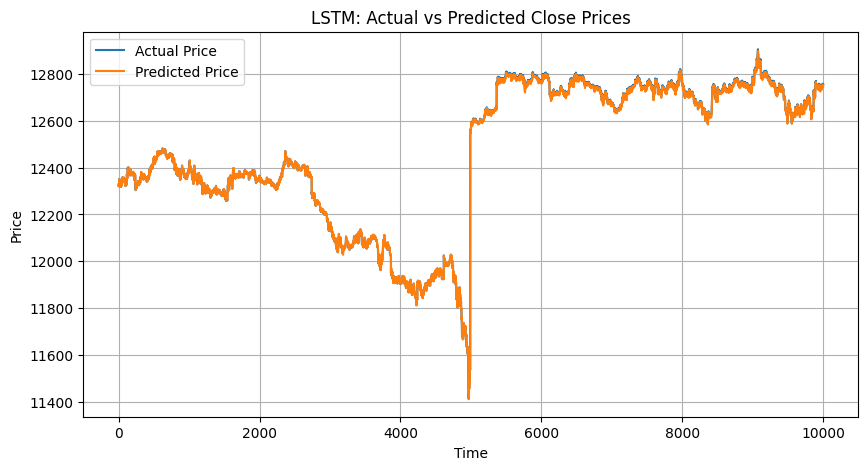

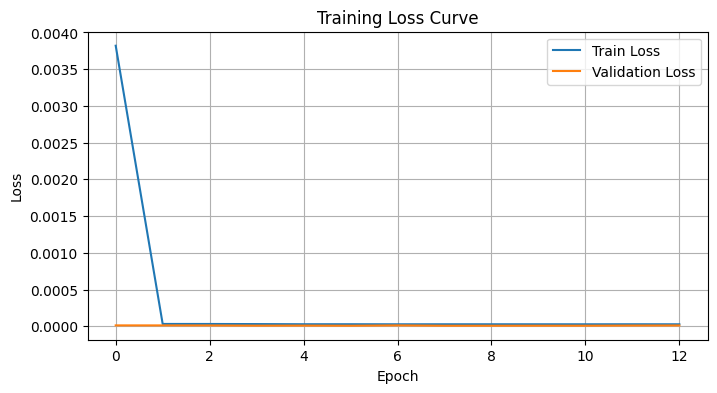

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Load Data
df = pd.read_csv("banknifty_first_50000.csv")
df = df[['close']]  # Use only 'Close' prices

# Step 2: Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']])

# Step 3: Create sequences with time_step = 1
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, time_step=1)

# Reshape X to [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Train/Test Split (80/20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Total samples: {len(X)}")
print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

# Step 5: Build LSTM Model (lighter version)
model_lstm = Sequential()
model_lstm.add(LSTM(10, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train Model with Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model_lstm.fit(
    X_train, y_train,
    epochs=100,
    batch_size=2,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Step 7: Make Predictions
y_pred_scaled = model_lstm.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 8: Evaluation Metrics
print("\n--- LSTM Model Evaluation ---")
print("MAE:", mean_absolute_error(y_actual, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_actual, y_pred)))
print("R² Score:", r2_score(y_actual, y_pred))

# Step 9: Plot Predictions
plt.figure(figsize=(10, 5))
plt.plot(y_actual, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('LSTM: Actual vs Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Plot Training Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
